[View in Colaboratory](https://colab.research.google.com/github/sephiroth7712/DL/blob/master/mnist.ipynb)

In [1]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step


In [2]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


[5 0 4 1 9 2 1 3 1 4]


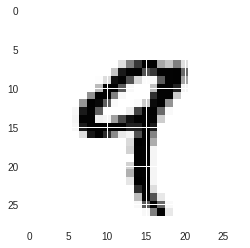

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtrain[4])
print(ytrain[0:10])

In [4]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
print(ytrain.shape,ytest.shape)

(60000, 10) (10000, 10)


In [5]:
print(ytrain[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
xtrain=xtrain/255
xtest=xtest/255

In [0]:
xtrain=xtrain.reshape(xtrain.shape[0],1,28,28)
xtest=xtest.reshape(xtest.shape[0],1,28,28)

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')
#fic random seed for reproducibility
seed=7
np.random.seed(seed)

In [9]:
model=Sequential()
model.add(Conv2D(30,(5,5),input_shape=(1,28,28),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(15,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))
#compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [13]:
model.fit(xtrain,ytrain,epochs=10,batch_size=100)
#Final evaluation of the model
scores=model.evaluate(xtest,ytest,verbose=0)
print("Large CNN Error :",(100-scores[1]*100),'%')

Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0491 - acc: 0.9850
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0408 - acc: 0.9871
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0362 - acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0312 - acc: 0.9901
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0276 - acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0253 - acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0232 - acc: 0.9926
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0225 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0205 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0201 - a

In [0]:
from google.colab import files
model.save("model.h5")
files.download("model.h5")

In [0]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
files.download("model.json")

In [25]:
predv=model.predict(xtest)
print(predv[0])

[4.1858680e-13 1.1169339e-09 8.1607819e-12 4.7164437e-09 1.1050681e-11
 1.4477415e-11 7.1380095e-17 1.0000000e+00 9.8236058e-11 4.1627395e-09]


In [23]:
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
